# Using pretrained models

In [1]:
from torchvision import models

In [2]:
dir(models) #A directory of all the models

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

The numbers tha follow the name of the model indicate how many layers there are. We will look at AlexNet

### AlexNet
AlexNet Architecture, old and small but one of the first realisations that deep learning can do a lot

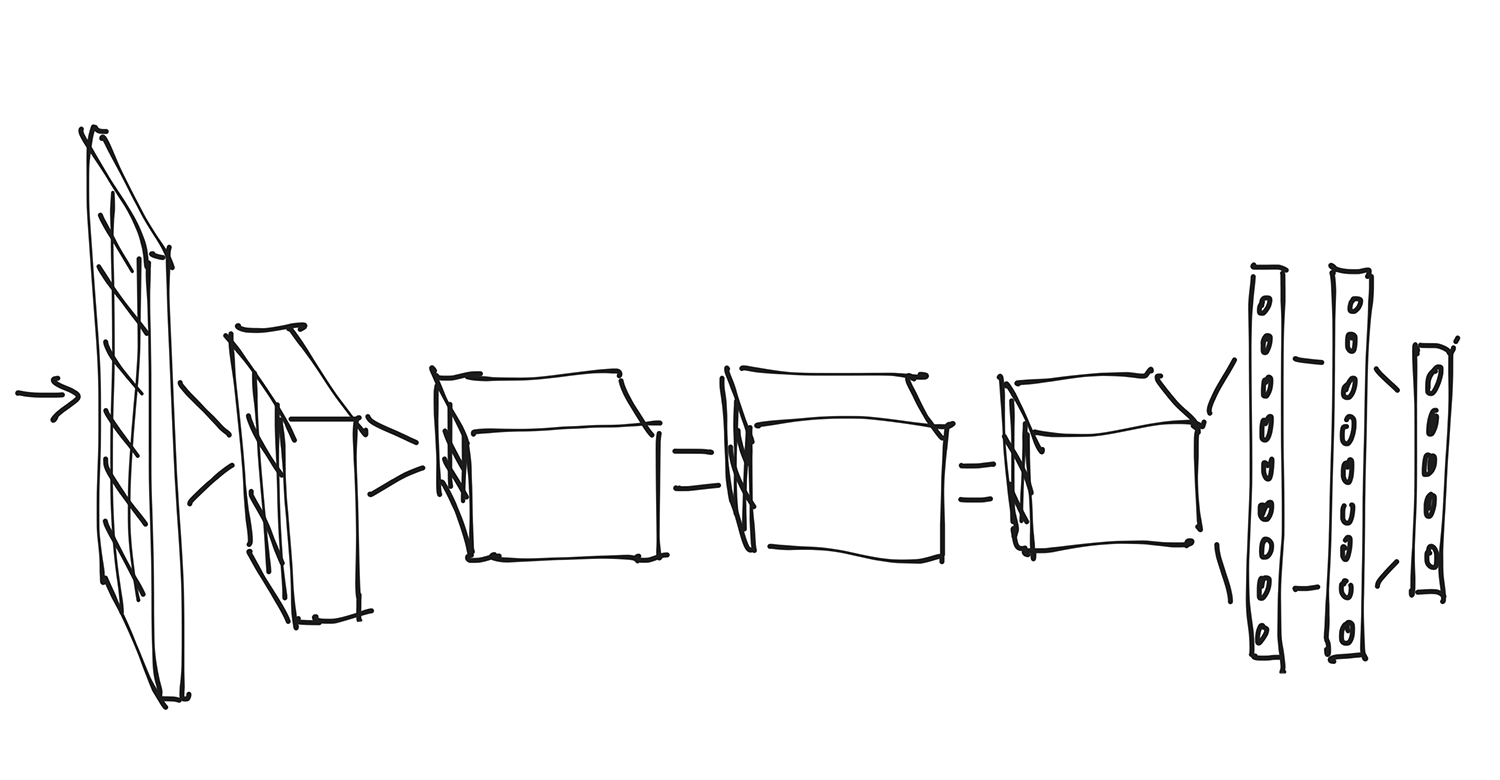

In [3]:
alexnet = models.AlexNet() #Will conduct a foward output that sends the image from the first layer all through the layers to the output

In [4]:
import numpy as np
#output = alexnet(input) #This wouldnt really do much since it is not trained

### ResNet
resnet 101 convolutional neural network

In [5]:
resnet = models.resnet101(pretrained=True) #Specifying pretrained also downloads the weights that were obtained when trained on 1.2 million instances or images 

/Users/rashid/pytorch-test/env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rashid/pytorch-test/env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
resnet # I am looking at all the layers

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Preprocessing

- Define a basic preprocessing pipeline

In [7]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

- Preprocessing function that scales input to size 256 x 256
- Crops the image in the center to a size of 224 x 224
- Transforms it to a tensor o that it canbe used for torch
- normalize the colors using the mean and standard deviations

In [8]:
from PIL import Image
img = Image.open("test.jpg")

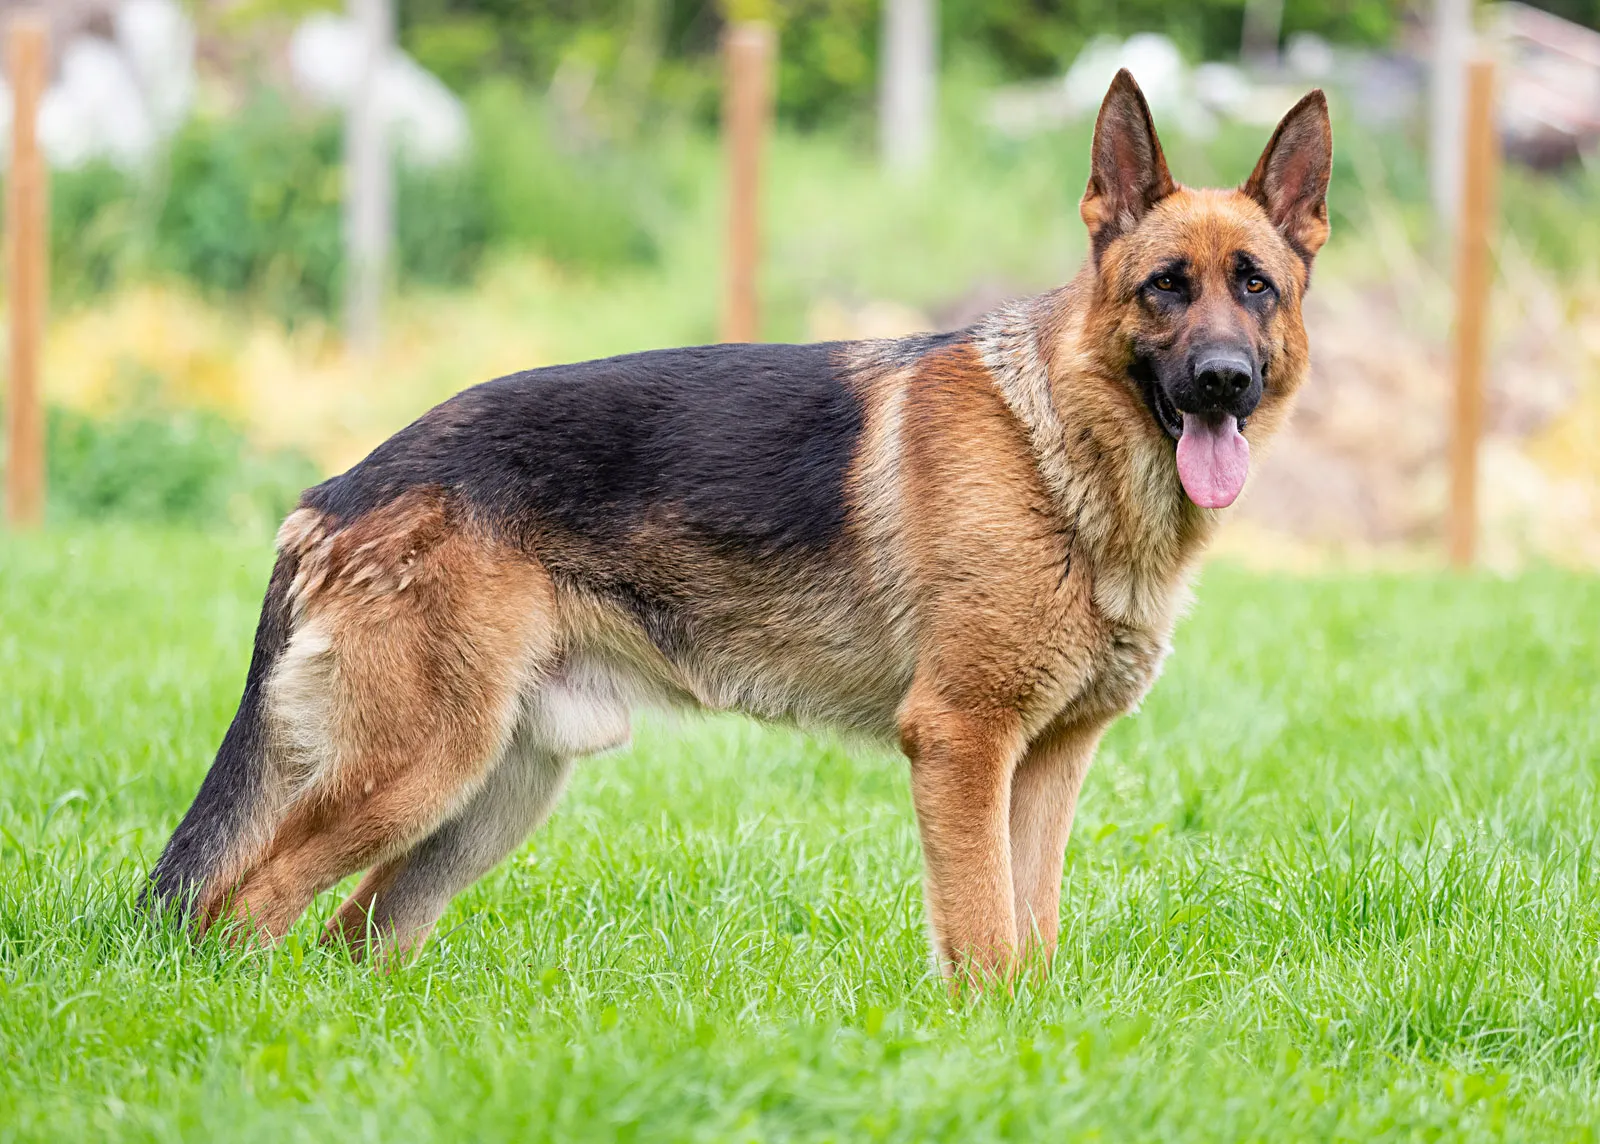

In [9]:
img

In [10]:
img_t = preprocess(img)

In [11]:
import torch

batch_t = torch.unsqueeze(img_t, 0) #Remember the mindmap, batch is the last step before the training starts

Batch will format it so that the model can recognise it

Can now conduct inference, which is running a trained model on new data. Must put the model in eval mode

In [12]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
out = resnet(batch_t)
out

tensor([[-7.5032e-01, -1.4214e+00, -1.6004e+00, -2.0805e+00, -3.5146e+00,
         -2.1252e+00, -2.7300e+00, -4.3760e-01,  1.9183e-01, -8.0495e-02,
         -1.6465e-01, -3.5569e-01, -1.0701e+00, -9.8873e-01, -7.0323e-01,
         -1.1845e+00,  6.0665e-01, -1.8088e-01, -8.6800e-01, -8.0013e-01,
         -2.7426e+00,  2.5298e-01, -3.5569e+00,  4.6519e-01, -1.5156e+00,
         -7.4309e-01, -1.8876e+00, -1.2668e+00, -2.0188e+00, -1.4430e+00,
         -3.6441e-01, -2.2004e+00, -7.8789e-01, -1.5602e+00, -1.9930e+00,
         -1.0468e+00, -1.6951e+00, -1.5094e+00, -7.7038e-01, -2.5887e+00,
          2.0045e-02, -1.5182e+00, -2.4067e-01, -8.0494e-01, -1.4533e+00,
         -8.2031e-01, -1.2943e-01, -7.4136e-01, -3.3438e+00, -7.6673e-01,
          5.0583e-01, -1.2240e+00,  1.1991e+00, -5.6375e-01, -5.3101e-01,
         -2.8240e-01, -3.0313e+00, -6.6054e-01, -5.3314e-02,  7.6260e-01,
          9.1095e-01, -4.5754e-01, -6.2414e-01,  6.6442e-01, -1.0835e+00,
         -1.1239e+00,  1.5543e-01, -4.

A vector of 1000 scores one per ImageNet class

In [14]:
with open("imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [15]:
_, index = torch.max(out, 1)

In [16]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 #Normalize all outputs to 0 - 1 then multiply by 100 to get confidence percentage
labels[index[0]], percentage[index[0]].item()

('231, collie', 99.80294036865234)

In [17]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('231, collie', 99.80294036865234),
 ('221, Irish_water_spaniel', 0.10534451901912689),
 ('251, dalmatian', 0.027471430599689484),
 ('269, timber_wolf', 0.009844686836004257),
 ('223, schipperke', 0.006739723961800337)]

- Training data had no german shepards so it mistook it as a collie which is pretty close


### GAN
Generative adversarial networks
Something is being generated, two networks are competing to outsmart each other
- Generator takes on the role of a painter tasked with producing real looking images
- Discriminator is the art inspector seeing if the image is fabricated or not
- Generator end goal is to fool discriminator
- Discriminator says if its real or fake and if its fake, it says its fake

![Screenshot 2024-10-18 at 12.14.30 PM.png](<attachment:Screenshot 2024-10-18 at 12.14.30 PM.png>)
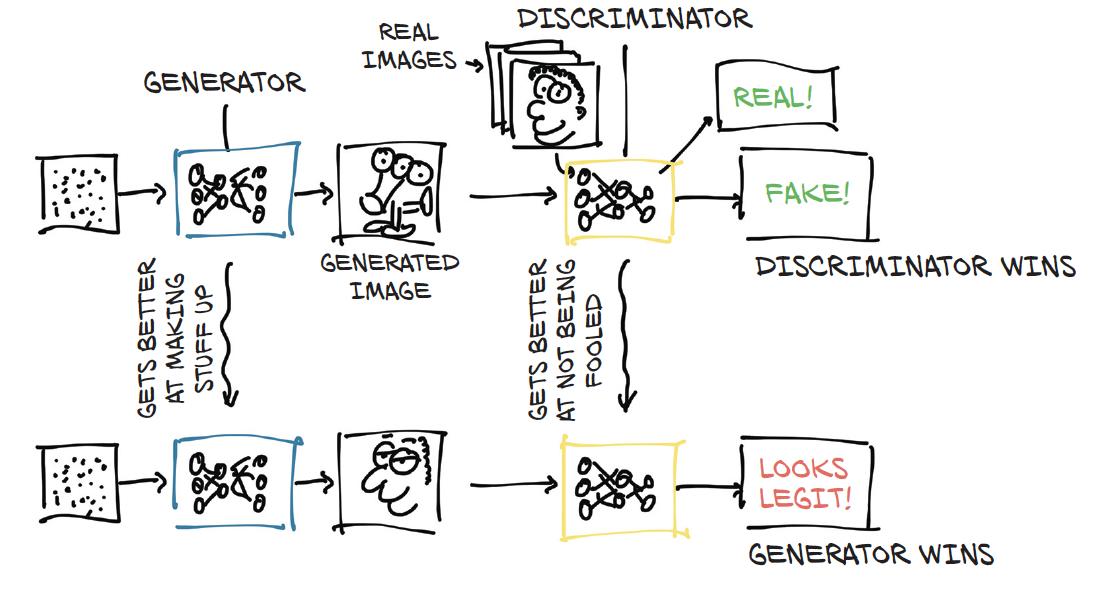

### Cycle GAN
Can turn photo of an object from one domain into another photo from another domain

![Screenshot 2024-10-18 at 12.19.01 PM.png](<attachment:Screenshot 2024-10-18 at 12.19.01 PM.png>)
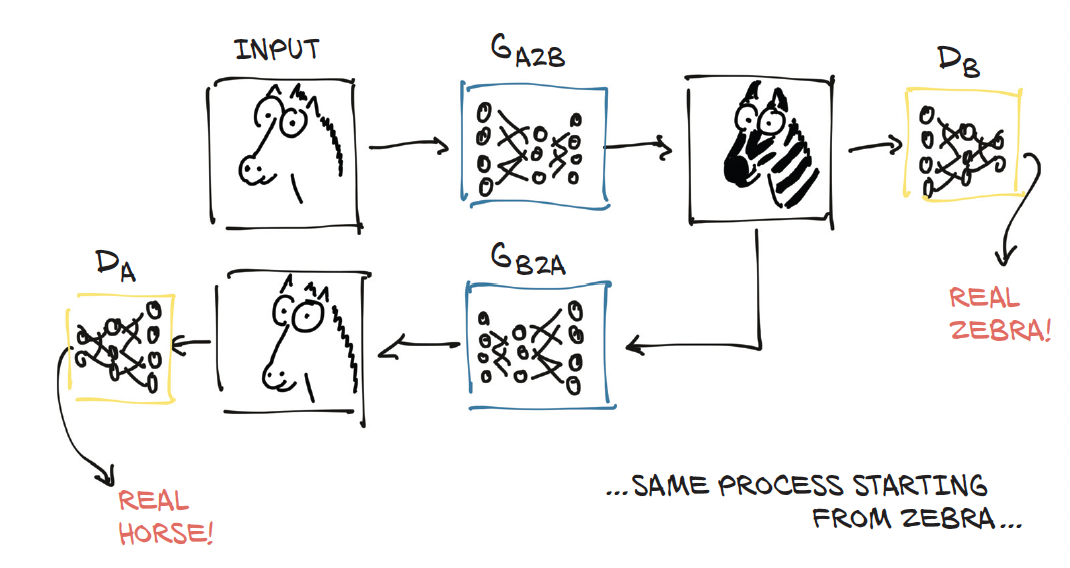

### Loading models from TorchHub

In [ ]:
import torch 
from torch import hub

#Using torchhub, using a github repo pytorch/vision from the master branch, get the resnet18 model, and make sure that it is pretrained
resnet18_model = hub.load("pytorch/vision:master",
                          "resnet18",
                          pretraned=True)